# This is my Built Model that Predicts Survival Rate on the RMS Titanic

by Dajah Vincent #CodeSoft [LinkedIn](https://www.linkedin.com/in/dajah-vincent-a-25ab5a9a/)


# Importing necessary packages


In [ ]:
#Importing all necessary packages to be used in manipulating the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# 1. Load & read the titanic datasets

In [ ]:
#Reading the Titanic datasets
df = pd.read_csv("/content/Titanic-Dataset.csv")

#To preview the dataset
#Also shows the number of rows and columns in the datset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Reading the last 10 rows from the titanic datasets
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df["Cabin"],df["Fare"]

(0       NaN
 1       C85
 2       NaN
 3      C123
 4       NaN
        ... 
 886     NaN
 887     B42
 888     NaN
 889    C148
 890     NaN
 Name: Cabin, Length: 891, dtype: object,
 0       7.2500
 1      71.2833
 2       7.9250
 3      53.1000
 4       8.0500
         ...   
 886    13.0000
 887    30.0000
 888    23.4500
 889    30.0000
 890     7.7500
 Name: Fare, Length: 891, dtype: float64)

In [ ]:
#Give the sum of all values in the columns

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Shows the number of uniqe values in the dataset's columns
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
#Shows the unique values from the survived columns of the dataset

df["Survived"].value_counts()


0    549
1    342
Name: Survived, dtype: int64

# 2. Plot Graphs

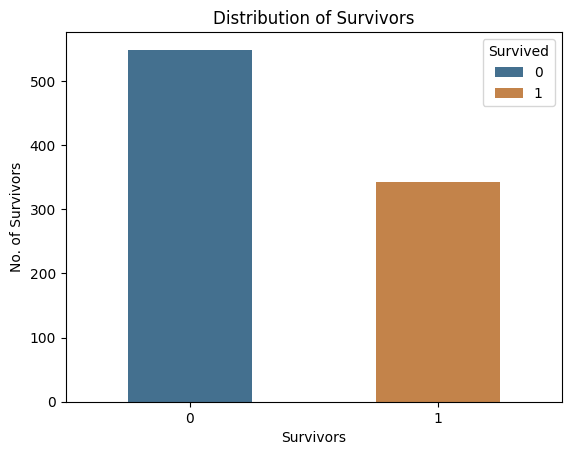

In [ ]:
ax = sb.countplot(data = df, x = "Survived", hue = "Survived", width = 0.5, saturation = 0.5)

ax.set_title('Distribution of Survivors')
ax.set_xlabel('Survivors')
ax.set_ylabel('No. of Survivors')

plt.show()

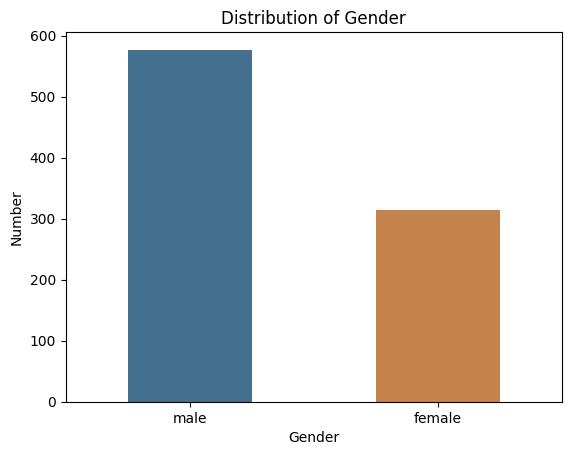

In [ ]:
ax = sb.countplot(data = df, x = "Sex", hue = "Sex", width = 0.5, saturation = 0.5)
ax.set_title('Distribution of Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Number')
plt.show()

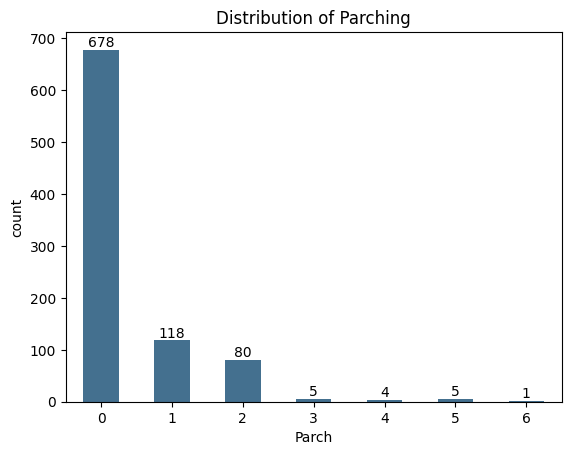

In [ ]:
ax = sb.countplot(data = df, x = "Parch", width = 0.5, saturation = 0.5)
ax.set_title('Distribution of Parching')

for label in ax.containers:
    ax.bar_label(label)

plt.show()

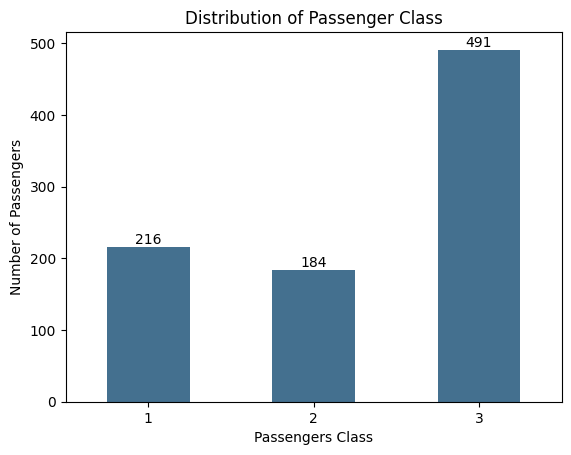

In [ ]:
ax = sb.countplot(data = df, x = "Pclass", width = 0.5, saturation = 0.5)
ax.set_title('Distribution of Passenger Class')
ax.set_ylabel('Number of Passengers')
ax.set_xlabel('Passengers Class')

for label in ax.containers:
    ax.bar_label(label)

plt.show()

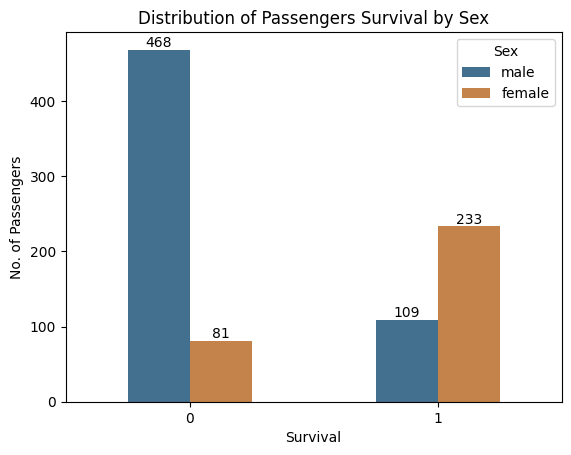

In [ ]:
ax = sb.countplot(data = df, x = "Survived", hue = "Sex", width = 0.5, saturation = 0.5)
ax.set_title('Distribution of Passengers Survival by Sex')
ax.set_ylabel('No. of Passengers')
ax.set_xlabel('Survival')

for label in ax.containers:
    ax.bar_label(label)

plt.show()

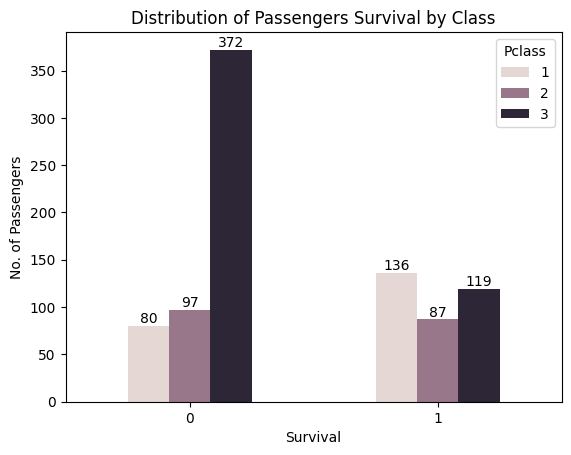

In [ ]:
ax = sb.countplot(data = df, x = "Survived", hue = "Pclass", width = 0.5, saturation = 0.5)
ax.set_title('Distribution of Passengers Survival by Class')
ax.set_ylabel('No. of Passengers')
ax.set_xlabel('Survival')

for label in ax.containers:
    ax.bar_label(label)

plt.show()

#Importing Model Building Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import *

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df2 = df.drop(columns = ["PassengerId", "Name", "Ticket", "Cabin"])

In [ ]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df3 = df2.dropna()

In [ ]:
df3.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
#Dropping the Em`barked coluns
df3.drop(columns = ['Embarked'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
889,1,1,male,26.0,0,0,30.0000


In [ ]:
import pandas as pd

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [ ]:
#Checking and confirming the dataframe types
df3.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
#Installing category encoders package
!pip install category_encoders
import category_encoders as ce

#Using category encorders for the sex column
encoder = ce.OneHotEncoder(cols=['Sex'])
x = encoder.fit_transform(x)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
#Splitting the training data to 75% of the dataset and testing data to 25%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 21, stratify = y)

#Using logistics regression
lr = LogisticRegression(max_iter = 150)
lr.fit(x_train, y_train)
y_test_pred = lr.predict(x_test)

#testing the accuracy of the model in percentage
accuracy_score(y_test_pred, y_test)*100

83.70786516853933

In [ ]:
y_test.shape

(178,)

In [ ]:
x_test.shape

(178, 7)